In [17]:
#importing dataset
import numpy as np
import pandas as pd 
hdata= pd.read_csv('D:/Datamining and machine learning/hotel_bookings.csv')
hdata.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [18]:
hdata.shape

(119390, 32)

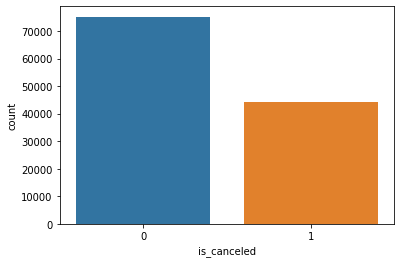

In [19]:
import seaborn as sns
#hdata['is_canceled'] = hdata.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = hdata['is_canceled']
sns.countplot(canceled_data)

In [21]:
#checking for missing values
hdata1=hdata
hdata1.isnull().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

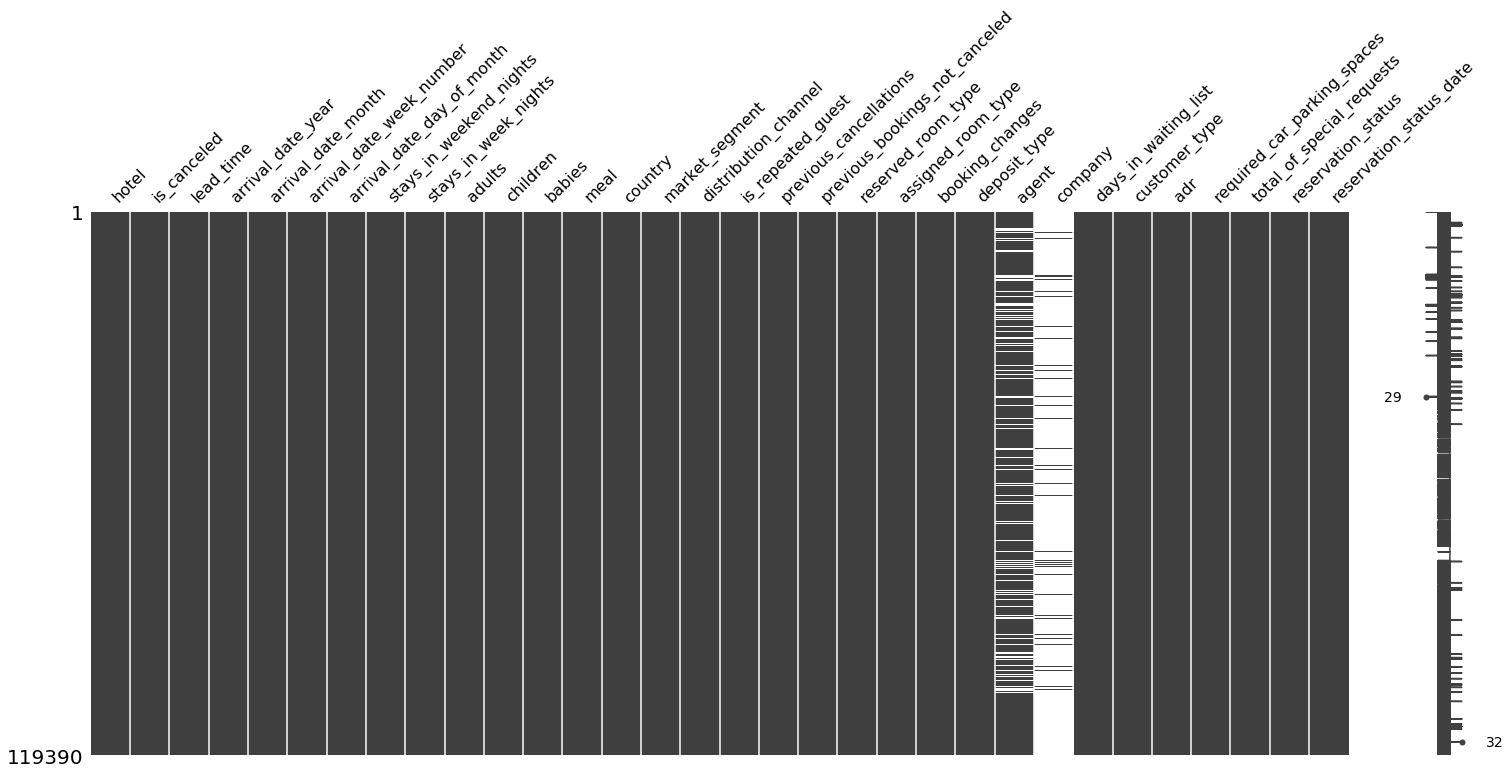

In [20]:
import matplotlib.pyplot as plt
import missingno as msno 
%matplotlib inline
msno.matrix(hdata)

In [22]:
hdata1.drop(['arrival_date_week_number','meal','agent','company','adr','reservation_status','country',
           'reservation_status_date'],axis=1,inplace=True)

In [23]:
hdata1[hdata1['children'].isnull()]['children']

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

In [24]:
#replacing missing values
hdata1['children'] = hdata1.children.fillna(0)

In [25]:
hdata1.isnull().sum(axis = 0)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [26]:
hdata2=hdata1[['is_canceled','lead_time','stays_in_week_nights','adults','previous_cancellations','deposit_type',
              'customer_type']]
hdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 7 columns):
is_canceled               119390 non-null int64
lead_time                 119390 non-null int64
stays_in_week_nights      119390 non-null int64
adults                    119390 non-null int64
previous_cancellations    119390 non-null int64
deposit_type              119390 non-null object
customer_type             119390 non-null object
dtypes: int64(5), object(2)
memory usage: 6.4+ MB


In [27]:
#transformaiton of data
column_transformation = [ 'deposit_type','customer_type']
hdata3 = pd.get_dummies(hdata2,columns = column_transformation,drop_first=True)
hdata3.head()

,is_canceled,lead_time,stays_in_week_nights,adults,previous_cancellations,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,2,0,0,0,0,1,0
1,0,737,0,2,0,0,0,0,1,0
2,0,7,1,1,0,0,0,0,1,0
3,0,13,1,1,0,0,0,0,1,0
4,0,14,2,2,0,0,0,0,1,0


In [28]:
cancel_corr = hdata3.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)[1:]

deposit_type_Non Refund          0.481457
lead_time                        0.293123
customer_type_Transient          0.133084
customer_type_Transient-Party    0.124135
previous_cancellations           0.110133
adults                           0.060017
customer_type_Group              0.038698
stays_in_week_nights             0.024765
deposit_type_Refundable          0.011312
Name: is_canceled, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

x = hdata3[hdata3.loc[:, hdata3.columns != 'is_canceled'].columns]
y = hdata3['is_canceled']

In [30]:
#splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
hdata3.shape

(119390, 10)

In [32]:
x_train.shape

(95512, 9)

In [33]:
x_test.shape

(23878, 9)

In [34]:
#normalising the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test.values)
x_train1=x_train_scaled
x_test1=x_test_scaled

In [35]:
#Applying Support vector machine model
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
svc=SVC() 
svc.fit(x_train1,y_train)
y_pred=svc.predict(x_test1)
print("Accuracy: %.2f%%" % ((metrics.accuracy_score(y_test,y_pred))*100))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
recall= confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
f1_score = (2*recall*precision)/(recall+precision)
print('Recall %.2f' % recall)
print('Precision %.2f' % precision)
print('F1-score :% .2f '% f1_score)

C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 74.73%
Confusion Matrix:
[[14898    36]
 [ 5998  2946]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

Recall 1.00
Precision 0.71
F1-score : 0.83 


Text(0.5, 0, 'Booking Cancelled')

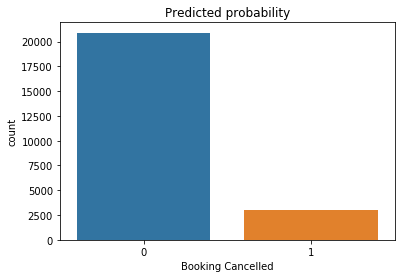

In [43]:
import seaborn as sns
sns.countplot(y_pred)
plt.title("Predicted probability")
plt.xlabel('Booking Cancelled')
# plt.ylabel('Counts')

In [38]:
#Predicted values and true values
print('True', y_test.values[25:50])
print('Pred', y_pred[25:50])

True [0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1]
Pred [0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]


In [39]:
#Applying Kfold validation technique
from sklearn.model_selection import KFold

model = SVC()
def kfold_validation(dataset, variables, k, shuffle = False):
    i = 1

    kfold = KFold(n_splits = k, shuffle = shuffle)

    for i_train, i_test in kfold.split(dataset):
        data = x_train1 #dataset.loc[i_train, variables[:-1]]
        target = y_train #dataset.loc[i_train, variables[-1]]

        model.fit(data, target)

        data = x_test1#dataset.loc[i_test, variables[:-1]]
        target = y_test#dataset.loc[i_test, variables[-1]]

        predicted = model.predict(data)
        print(53 * '-' + f'\nFold {i} | train: {len(i_train)} | test: {len(i_test)}')
        print(metrics.classification_report(target, predicted))
        print(metrics.confusion_matrix(target, predicted))
        
        i += 1
        
    return kfold

kfold_validation(x_train1,y_train, 5)


C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------------------------
Fold 1 | train: 76409 | test: 19103
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[14898    36]
 [ 5998  2946]]


C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------------------------
Fold 2 | train: 76409 | test: 19103
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[14898    36]
 [ 5998  2946]]


C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------------------------
Fold 3 | train: 76410 | test: 19102
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[14898    36]
 [ 5998  2946]]


C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------------------------
Fold 4 | train: 76410 | test: 19102
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[14898    36]
 [ 5998  2946]]


C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------------------------
Fold 5 | train: 76410 | test: 19102
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14934
           1       0.99      0.33      0.49      8944

    accuracy                           0.75     23878
   macro avg       0.85      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878

[[14898    36]
 [ 5998  2946]]


KFold(n_splits=5, random_state=None, shuffle=False)

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10, random_state=2)
results_kfold = cross_val_score(svc, x_train1, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Pooja K\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

Accuracy: 75.09%


In [51]:
#Navie Bayes model 
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(x_train1, y_train)
y_pred = bnb.predict(x_test1)
print("Accuracy: %.2f%%" % ((metrics.accuracy_score(y_test,y_pred))*100))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
precision = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
recall= confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
f1_score = (2*recall*precision)/(recall+precision)
print('Recall %.2f' % recall)
print('Precision %.2f' % precision)
print('F1-score :% .2f '% f1_score)


Accuracy: 76.20%
Confusion Matrix:
[[14807   127]
 [ 5556  3388]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     14934
           1       0.96      0.38      0.54      8944

    accuracy                           0.76     23878
   macro avg       0.85      0.69      0.69     23878
weighted avg       0.82      0.76      0.73     23878

Recall 0.99
Precision 0.73
F1-score : 0.84 


In [46]:
#validating naive bayes model
from sklearn.model_selection import KFold

model = BernoulliNB()
def kfold_validation(dataset, variables, k, shuffle = False):
    i = 1

    kfold = KFold(n_splits = k, shuffle = shuffle)

    for i_train, i_test in kfold.split(dataset):
        data = x_train1 #dataset.loc[i_train, variables[:-1]]
        target = y_train #dataset.loc[i_train, variables[-1]]

        model.fit(data, target)

        data = x_test1#dataset.loc[i_test, variables[:-1]]
        target = y_test#dataset.loc[i_test, variables[-1]]

        predicted = model.predict(data)
        print(53 * '-' + f'\nFold {i} | train: {len(i_train)} | test: {len(i_test)}')
        print(metrics.classification_report(target, predicted))
        print(metrics.confusion_matrix(target, predicted))
        
        i += 1
        
    return kfold

kfold_validation(x_train1,y_train, 5)


-----------------------------------------------------
Fold 1 | train: 76409 | test: 19103
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     14934
           1       0.96      0.38      0.54      8944

    accuracy                           0.76     23878
   macro avg       0.85      0.69      0.69     23878
weighted avg       0.82      0.76      0.73     23878

[[14807   127]
 [ 5556  3388]]
-----------------------------------------------------
Fold 2 | train: 76409 | test: 19103
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     14934
           1       0.96      0.38      0.54      8944

    accuracy                           0.76     23878
   macro avg       0.85      0.69      0.69     23878
weighted avg       0.82      0.76      0.73     23878

[[14807   127]
 [ 5556  3388]]
-----------------------------------------------------
Fold 3 | train: 76410 | test: 19102
              

KFold(n_splits=5, random_state=None, shuffle=False)

In [47]:
from sklearn.model_selection import KFold

results_kfold = cross_val_score(bnb, x_train, y_train, cv=kfold)
print("Average of Kfold")
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Average of Kfold
Accuracy: 76.58%


In [48]:
print('True', y_test.values[25:50])
print('Pred', y_pred[25:50])

True [0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1]
Pred [0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]


Text(0.5, 0, 'Booking Cancelled')

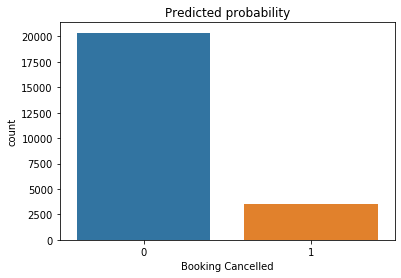

In [49]:
import seaborn as sns
sns.countplot(y_pred)
plt.title("Predicted probability")
plt.xlabel('Booking Cancelled')
# plt.ylabel('Counts')